In [1]:
import pandas as pd 
import os

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
os.chdir(r"C:\Users\dsala\Downloads")
train = pd.read_csv('train_PS3.csv')
test = pd.read_csv('test_PS3.csv')

In [3]:
# Mostrar información básica

train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38644 entries, 0 to 38643
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   property_id                            38644 non-null  object 
 1   city                                   38644 non-null  object 
 2   price                                  38644 non-null  int64  
 3   month                                  38644 non-null  int64  
 4   year                                   38644 non-null  int64  
 5   surface_total                          7854 non-null   float64
 6   surface_covered                        8565 non-null   float64
 7   rooms                                  20384 non-null  float64
 8   bedrooms                               38644 non-null  int64  
 9   bathrooms                              28573 non-null  float64
 10  property_type                          38644 non-null  object 
 11  op

In [4]:
# Columnas irrelevantes a eliminar
columns_to_drop = ['property_id', 'city', 'title', 'description', 'operation_type', 'month','num_banos', 'year','barrio','cerca_virrey','num_parqueaderos']

# Eliminar estas columnas en train y test
train = train.drop(columns=columns_to_drop, errors='ignore')
test = test.drop(columns=columns_to_drop, errors='ignore')

# Verificar columnas restantes
print("\nColumnas después de eliminar irrelevantes:")
print(train.columns)



Columnas después de eliminar irrelevantes:
Index(['price', 'surface_total', 'surface_covered', 'rooms', 'bedrooms',
       'bathrooms', 'property_type', 'lat', 'lon',
       'distance_to_nearest_hospital', 'distance_to_nearest_park',
       'distance_to_nearest_transport_station',
       'distance_to_financial_center'],
      dtype='object')


In [6]:
train['log_price'] = np.log1p(train['price'])

In [5]:
# Crear la dummy property_type_Casa
train['property_type_Casa'] = train['property_type'].apply(lambda x: 1 if x == 'Casa' else 0)
test['property_type_Casa'] = test['property_type'].apply(lambda x: 1 if x == 'Casa' else 0)

# Verificar la transformación
print("\nDistribución de property_type_Casa en train:")
print(train['property_type_Casa'].value_counts())

print("\nDistribución de property_type_Casa en test:")
print(test['property_type_Casa'].value_counts())

# Eliminar la columna original property_type
train = train.drop(columns=['property_type'], errors='ignore')
test = test.drop(columns=['property_type'], errors='ignore')

# Verificar las columnas finales
print("\nColumnas finales en train:")
print(train.columns)

print("\nColumnas finales en test:")
print(test.columns)



Distribución de property_type_Casa en train:
property_type_Casa
0    29177
1     9467
Name: count, dtype: int64

Distribución de property_type_Casa en test:
property_type_Casa
0    10012
1      274
Name: count, dtype: int64

Columnas finales en train:
Index(['price', 'surface_total', 'surface_covered', 'rooms', 'bedrooms',
       'bathrooms', 'lat', 'lon', 'distance_to_nearest_hospital',
       'distance_to_nearest_park', 'distance_to_nearest_transport_station',
       'distance_to_financial_center', 'property_type_Casa'],
      dtype='object')

Columnas finales en test:
Index(['price', 'surface_total', 'surface_covered', 'rooms', 'bedrooms',
       'bathrooms', 'lat', 'lon', 'distance_to_nearest_hospital',
       'distance_to_nearest_park', 'distance_to_nearest_transport_station',
       'distance_to_financial_center', 'property_type_Casa'],
      dtype='object')



Importancia de características:
bathrooms                                0.285177
distance_to_financial_center             0.159076
lon                                      0.118510
lat                                      0.070661
distance_to_nearest_park                 0.058089
distance_to_nearest_hospital             0.056133
distance_to_nearest_transport_station    0.055461
bedrooms                                 0.053415
surface_covered                          0.042025
surface_total                            0.038298
rooms                                    0.033797
property_type_Casa                       0.029359
dtype: float64


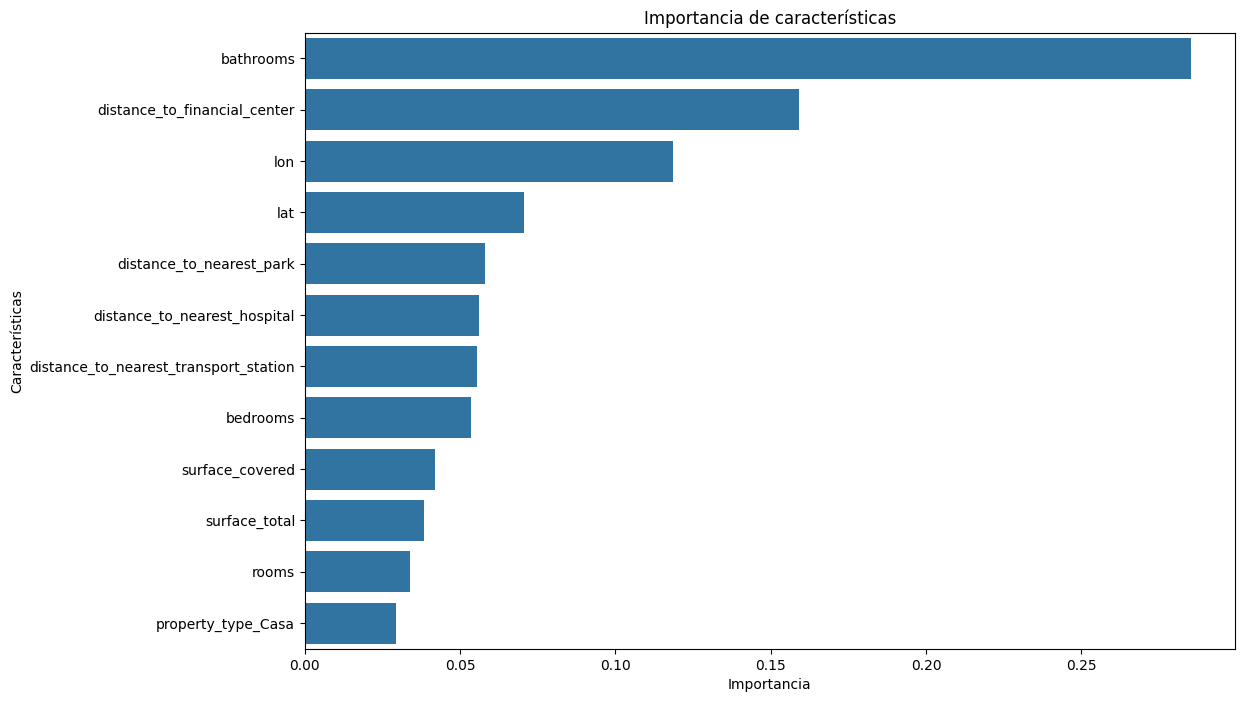

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Separar objetivo (log_price) y características
y = train['log_price']
X = train.drop(columns=['log_price', 'price'], errors='ignore')

# Dividir en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Obtener importancia de características
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Mostrar importancia
print("\nImportancia de características:")
print(importances)

# Graficar
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=importances.index)
plt.title('Importancia de características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


In [7]:
# Verificar estadísticos básicos de las variables numéricas
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
print("\nEstadísticos básicos de las variables numéricas:")
print(train[numeric_columns].describe())



Estadísticos básicos de las variables numéricas:
              price  surface_total  surface_covered         rooms  \
count  3.864400e+04   7.854000e+03     8.565000e+03  2.038400e+04   
mean   6.545347e+08  -2.533129e-17    -5.973039e-17 -1.568604e-17   
std    3.114179e+08   1.000064e+00     1.000058e+00  1.000025e+00   
min    3.000000e+08  -5.028205e-01    -1.695982e+00 -1.464465e+00   
25%    4.150000e+08  -2.549645e-01    -6.648107e-01 -7.353266e-01   
50%    5.599900e+08  -1.273915e-01    -3.123850e-01 -6.188233e-03   
75%    8.100000e+08   1.131747e-01     3.663609e-01 -6.188233e-03   
max    1.650000e+09   6.190223e+01     1.571646e+01  5.826919e+00   

           bedrooms     bathrooms           lat           lon  \
count  3.864400e+04  2.857300e+04  38644.000000  38644.000000   
mean  -2.794806e-17  1.511952e-16      4.691164    -74.062839   
std    1.000013e+00  1.000017e+00      0.037480      0.032112   
min   -2.048871e+00 -1.723126e+00      4.576710    -74.170205   
25%

In [6]:
from sklearn.preprocessing import StandardScaler

# Lista de columnas a normalizar (excluyendo log_price, lat y lon)
columns_to_normalize = [
    'surface_total', 'surface_covered', 'rooms', 'bedrooms', 'bathrooms',
    'distance_to_nearest_hospital', 'distance_to_nearest_park',
    'distance_to_nearest_transport_station', 'distance_to_financial_center'
]

# Crear el scaler
scaler = StandardScaler()

# Normalizar en train
train[columns_to_normalize] = scaler.fit_transform(train[columns_to_normalize])

# Normalizar en test usando los mismos parámetros
test[columns_to_normalize] = scaler.transform(test[columns_to_normalize])

# Verificar resultados
print("\nPrimeras filas después de normalización (excepto lat y lon):")
print(train[columns_to_normalize].head())



Primeras filas después de normalización (excepto lat y lon):
   surface_total  surface_covered     rooms  bedrooms  bathrooms  \
0            NaN              NaN -0.006188 -0.094216        NaN   
1            NaN              NaN  4.368642  3.815094        NaN   
2            NaN              NaN  3.639504  3.163543        NaN   
3            NaN              NaN  2.181227  1.860439        NaN   
4            NaN              NaN       NaN -0.094216   0.106317   

   distance_to_nearest_hospital  distance_to_nearest_park  \
0                     -0.170301                  0.716997   
1                      1.372959                 -1.096929   
2                      0.163687                  0.089085   
3                     -0.644768                  2.486199   
4                      2.959461                  0.036245   

   distance_to_nearest_transport_station  distance_to_financial_center  
0                              -0.367021                      0.418769  
1               

In [13]:
# Verificar media y desviación estándar de las columnas normalizadas
columns_to_check = columns_to_normalize  # Las columnas que se normalizaron

# Calcular estadísticas
mean_values = train[columns_to_check].mean()
std_values = train[columns_to_check].std()

# Mostrar resultados
print("\nMedia de las columnas normalizadas:")
print(mean_values)

print("\nDesviación estándar de las columnas normalizadas:")
print(std_values)



Media de las columnas normalizadas:
surface_total                           -2.533129e-17
surface_covered                         -5.973039e-17
rooms                                   -1.568604e-17
bedrooms                                -2.794806e-17
bathrooms                                1.511952e-16
distance_to_nearest_hospital             2.824225e-16
distance_to_nearest_park                 2.228490e-16
distance_to_nearest_transport_station   -8.457967e-17
distance_to_financial_center            -3.905374e-16
dtype: float64

Desviación estándar de las columnas normalizadas:
surface_total                            1.000064
surface_covered                          1.000058
rooms                                    1.000025
bedrooms                                 1.000013
bathrooms                                1.000017
distance_to_nearest_hospital             1.000013
distance_to_nearest_park                 1.000013
distance_to_nearest_transport_station    1.000013
distance_to

separar datos

In [6]:
from sklearn.model_selection import train_test_split

# Separar características (X) y objetivo (y)

X = train.drop(columns=['log_price', 'price'], errors='ignore')
y = train['price']  # Usar directamente el precio


# Dividir en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=202013547)

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_val: {X_val.shape}")


Dimensiones de X_train: (30915, 12)
Dimensiones de X_val: (7729, 12)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Construir la red neuronal
model = Sequential([
    Dense(264, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Salida para predecir log_price
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Resumen del modelo
model.summary()


c:\Users\dsala\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 264)            │         3,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 264)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        33,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,721 (186.41 KB)

 Trainable params: 47,721 (186.41 KB)

 Non-trainable params: 0 (0.00 B)

Entrenar el modelo

In [8]:
# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=150,
    batch_size=16,
    verbose=1
)


Epoch 1/150
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 523455770629505024.0000 - mean_absolute_error: 654075520.0000 - val_loss: 531763199452643328.0000 - val_mean_absolute_error: 657596416.0000
Epoch 2/150
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 521027224321654784.0000 - mean_absolute_error: 650620160.0000 - val_loss: 504103403907973120.0000 - val_mean_absolute_error: 636217344.0000
Epoch 3/150
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 480249430423896064.0000 - mean_absolute_error: 619375552.0000 - val_loss: 430959458022064128.0000 - val_mean_absolute_error: 575872192.0000
Epoch 4/150
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 396145071595978752.0000 - mean_absolute_error: 545436416.0000 - val_loss: 312991515448180736.0000 - val_mean_absolute_error: 462235104.0000
Epoch 5/150
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 274519792570859520.0000 - mean_absolute_error: 418510272.0000 - val_loss: 188290541622919168.0000 - val_mean_absolute_error: 

Evaluar

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predicciones en validación
y_val_pred = model.predict(X_val)
# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae = mean_absolute_error(y_val, y_val_pred)

print(f"Red Neuronal - RMSE: {rmse:.2f}, MAE: {mae:.2f}")



242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Red Neuronal - RMSE: 320160631.35, MAE: 242292038.23


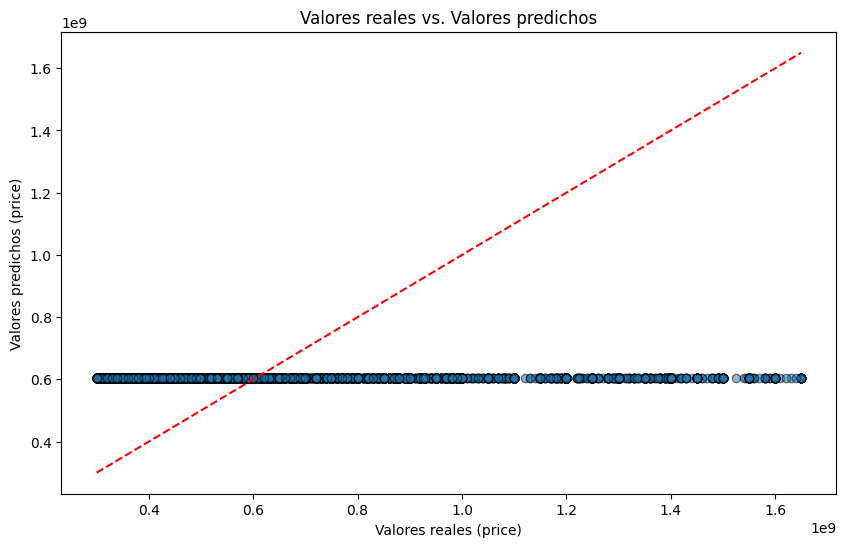

In [10]:
import matplotlib.pyplot as plt
# Scatter plot: valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5, edgecolor='k')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.title('Valores reales vs. Valores predichos')
plt.xlabel('Valores reales (price)')
plt.ylabel('Valores predichos (price)')
plt.show()


In [16]:
# Estadísticas de las columnas de X_train
print("\nVariabilidad en X_train:")
print(X_train.std())

# Identificar columnas con baja variabilidad
low_variance_columns = X_train.columns[X_train.std() < 0.01]
print(f"Columnas con baja variabilidad: {low_variance_columns}")



Variabilidad en X_train:
surface_total                            0.985151
surface_covered                          0.983315
rooms                                    0.998626
bedrooms                                 0.997779
bathrooms                                0.995294
lat                                      0.037484
lon                                      0.032131
distance_to_nearest_hospital             0.997497
distance_to_nearest_park                 1.008884
distance_to_nearest_transport_station    1.002662
distance_to_financial_center             0.999337
property_type_Casa                       0.429224
dtype: float64
Columnas con baja variabilidad: Index([], dtype='object')



Distribución de y_train:
count    3.091500e+04
mean     6.532055e+08
std      3.104592e+08
min      3.000000e+08
25%      4.150000e+08
50%      5.550000e+08
75%      8.000000e+08
max      1.650000e+09
Name: price, dtype: float64


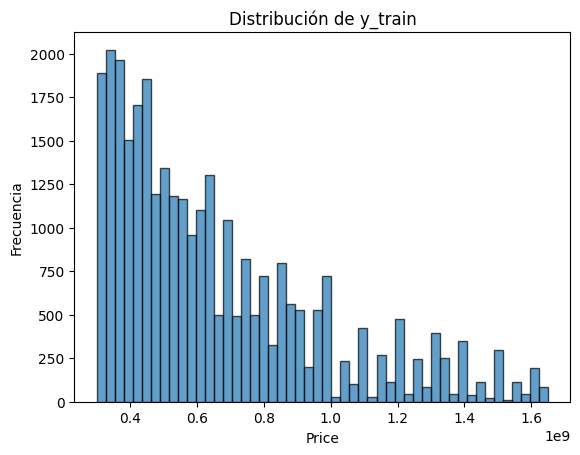

In [17]:
# Ver distribución de y_train
print("\nDistribución de y_train:")
print(y_train.describe())

# Histograma de y_train
import matplotlib.pyplot as plt
plt.hist(y_train, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución de y_train')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predicciones en validación
y_val_pred_log = model.predict(X_val)

# Revertir de log_price a price
y_val_pred = np.expm1(y_val_pred_log)
y_val_original = np.expm1(y_val)

# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_val_original, y_val_pred))
mae = mean_absolute_error(y_val_original, y_val_pred)

print(f"Red Neuronal - RMSE: {rmse:.2f}, MAE: {mae:.2f}")


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Red Neuronal - RMSE: 321375717.78, MAE: 241693067.71


In [22]:
# Asegurar que test tenga las mismas columnas que train
X_test = test[X_train.columns]


In [35]:
# Predicciones en test
y_test_pred_log = model.predict(X_test)

# Convertir de log_price a price
test['price'] = np.expm1(y_test_pred_log)

# Guardar las predicciones
submission = test[['property_id', 'price']]
submission.to_csv('submission_NN.csv', index=False)

print("Predicciones guardadas en 'submission.csv'")



322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicciones guardadas en 'submission.csv'
